In [1]:
"""
Plotting script for PRIDE stats visualization

Takes the project accession number with their registration dates as one input file,
and the queried file sizes for each registration date as another input file.

Number of projects and file sizes will be accumulated for each year and then displayed
as a scatterplot with connected lines.

Author: Sven Fillinger and Luis de la Garza, Quantitative Biology Center, University of Tübingen
Date: 15-10-2018
"""
import sys
import os
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt



In [2]:
# Load the input data
# 1st the PRIDE project accessions and registration date
date_projects_map = {}

with open("pride_growth/project_accessions_and_date.tsv", "r") as fh: content = fh.readlines()

for line in content:
    accession, date = line.strip().split("\t")
    year = date.split("-")[0]
    if not date_projects_map.get(year):
        date_projects_map[year] = 1
    else:
        date_projects_map[year] += 1

In [3]:
# Accumulate accessions per year
acc_year_project_map = {}
acc_sum = 0
for year, accessions in date_projects_map.items():
    acc_sum += accessions
    acc_year_project_map[year] = acc_sum
acc_year_project_map

{'2005': 6,
 '2006': 18,
 '2007': 36,
 '2008': 58,
 '2009': 110,
 '2010': 185,
 '2011': 297,
 '2012': 480,
 '2013': 735,
 '2014': 1221,
 '2015': 2017,
 '2016': 3213,
 '2017': 4535,
 '2018': 5931}

In [4]:
# 2nd the PRIDE file sizes per date
date_volume_map = {}

with open("pride_growth/file_volumes_per_date.tsv", "r") as fh: content = fh.readlines()
    
for line in content:
        date, volume = line.strip().split("\t")
        # convert from Byte to Tbyte
        volume = float(volume) / (10**12)
        year = date.split("-")[0]
        if not date_volume_map.get(year):
            date_volume_map[year] = volume
        else:
            date_volume_map[year] += volume
date_volume_map

{'2005': 0.000249712625,
 '2006': 0.001032807479,
 '2007': 0.006949405677,
 '2008': 0.10605315190299999,
 '2009': 0.275854269367,
 '2010': 0.136562820052,
 '2011': 0.3139519998860001,
 '2012': 1.2479034081559992,
 '2013': 13.941610674196998,
 '2014': 27.249753089537997,
 '2015': 49.78444966302697,
 '2016': 71.02395538055896,
 '2017': 104.72215594121201,
 '2018': 107.99626279165896}

In [5]:
# Accumulate accessions per year
acc_year_volume_map = {}
acc_sum = 0
for year, volumes in date_volume_map.items():
    acc_sum += volumes
    acc_year_volume_map[year] = acc_sum
acc_year_volume_map

{'2005': 0.000249712625,
 '2006': 0.0012825201040000001,
 '2007': 0.008231925781,
 '2008': 0.114285077684,
 '2009': 0.390139347051,
 '2010': 0.526702167103,
 '2011': 0.8406541669890001,
 '2012': 2.0885575751449994,
 '2013': 16.030168249341997,
 '2014': 43.279921338879994,
 '2015': 93.06437100190696,
 '2016': 164.08832638246594,
 '2017': 268.81048232367795,
 '2018': 376.8067451153369}

In [6]:
plot_dict = {
    'projects per year': list(acc_year_project_map.values()),
    'repository size per year': list(acc_year_volume_map.values())
}
data = pd.DataFrame.from_dict(plot_dict)
data.index = acc_year_project_map.keys()

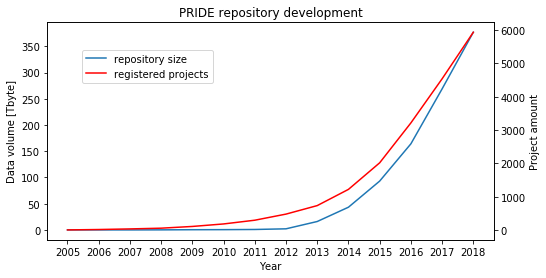

In [8]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)
sns_plot = sn.lineplot(data=data.loc[:,'repository size per year'], legend=False )
sns_plot.set(title="PRIDE repository development",
            xlabel="Year")
sns_plot.set(ylabel="Data volume [Tbyte]")

sns_plot.twinx()

sns_plot2 = sn.lineplot(data=data.loc[:,'projects per year'], color="r", legend=False)
sns_plot2.set(ylabel="Project amount")
sns_plot2.autoscale_view()
sns_plot.get_figure().legend(["repository size", "registered projects"], loc=(0.15,0.7))
sns_plot2.get_figure().savefig("figures/pride_growth.eps", dpi=300)
sns_plot2.get_figure().savefig("figures/pride_growth.png", dpi=300)